# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df.describe(include='object')

,sales_channel,trip_type,route,booking_origin
count,50000,50000,50000,50000
unique,2,3,799,104
top,Internet,RoundTrip,AKLKUL,Australia
freq,44382,49497,2680,17872


In [9]:
df.columns.tolist()

['num_passengers',
 'sales_channel',
 'trip_type',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'route',
 'booking_origin',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'booking_complete']

In [10]:
## most populare booking origin
df.groupby('booking_origin')['booking_complete'].sum().sort_values(ascending=False).head(10)

booking_origin
Malaysia       2468
Australia       900
China           694
Indonesia       615
Japan           478
Thailand        470
South Korea     462
Singapore       299
Taiwan          224
India           131
Name: booking_complete, dtype: int64

In [11]:
## most populare route
df.groupby('route')['booking_complete'].sum().sort_values(ascending=False).head(10)

route
AKLKUL    567
PENTPE    401
DMKKIX    187
JHBKTM    164
MELPEN    137
ICNPEN    135
KTMPEN    118
CGKHND    105
HNDPEN     98
CGKKIX     96
Name: booking_complete, dtype: int64

In [12]:
df.groupby('booking_complete')['wants_extra_baggage'].mean()

booking_complete
0    0.655331
1    0.745253
Name: wants_extra_baggage, dtype: float64

In [13]:
df.groupby('booking_complete')['wants_in_flight_meals'].mean()

booking_complete
0    0.421641
1    0.458411
Name: wants_in_flight_meals, dtype: float64

In [14]:
df.groupby('booking_complete')['wants_preferred_seat'].mean()

booking_complete
0    0.287357
1    0.351565
Name: wants_preferred_seat, dtype: float64

In [15]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [16]:
df['sales_channel'].value_counts(normalize=True)

sales_channel
Internet    0.88764
Mobile      0.11236
Name: proportion, dtype: float64

In [17]:
df['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [18]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [19]:
#checking for empty string
df.eq('').sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

<Axes: xlabel='flight_day'>

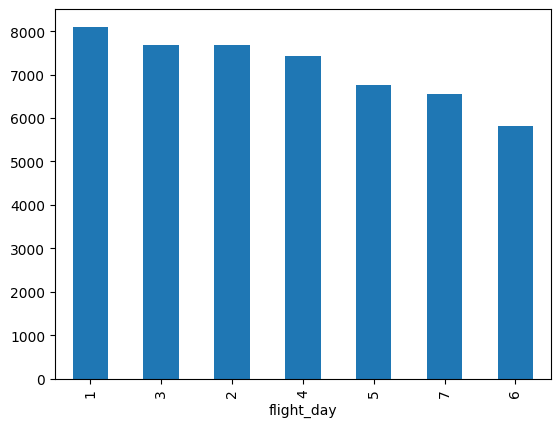

In [20]:
df['flight_day'].value_counts().plot(kind='bar')

<Axes: xlabel='flight_day'>

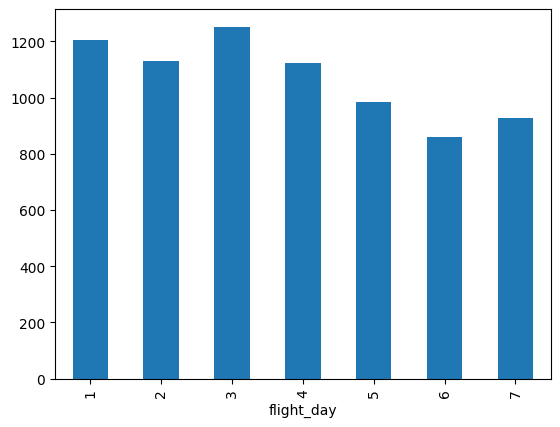

In [21]:
df.groupby('flight_day')['booking_complete'].sum().plot(kind='bar')

### **Data quality**

In [22]:
## duplicates
df.duplicated().sum()

np.int64(719)

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.columns.tolist()

['num_passengers',
 'sales_channel',
 'trip_type',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'route',
 'booking_origin',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'booking_complete']

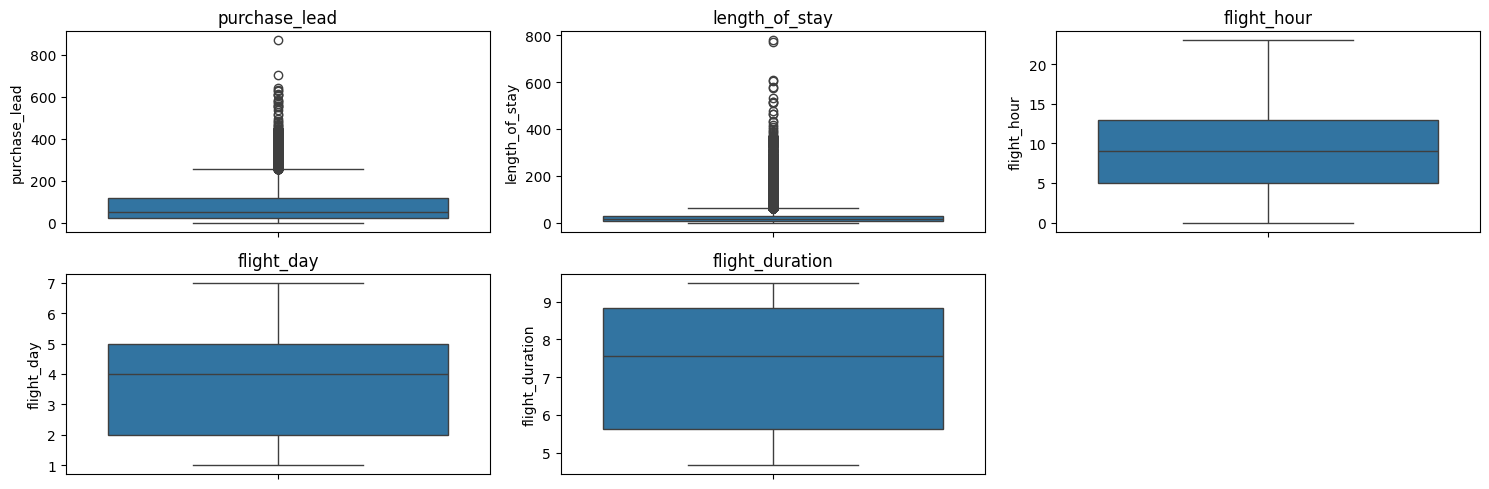

In [25]:
## Outliers
## using box plots for numerics
num_cols = ['purchase_lead','length_of_stay','flight_hour','flight_day','flight_duration',]
plt.figure(figsize=(15,5))
for i, col in enumerate(num_cols):
  plt.subplot(2,3,i+1)
  sns.boxplot(y = df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

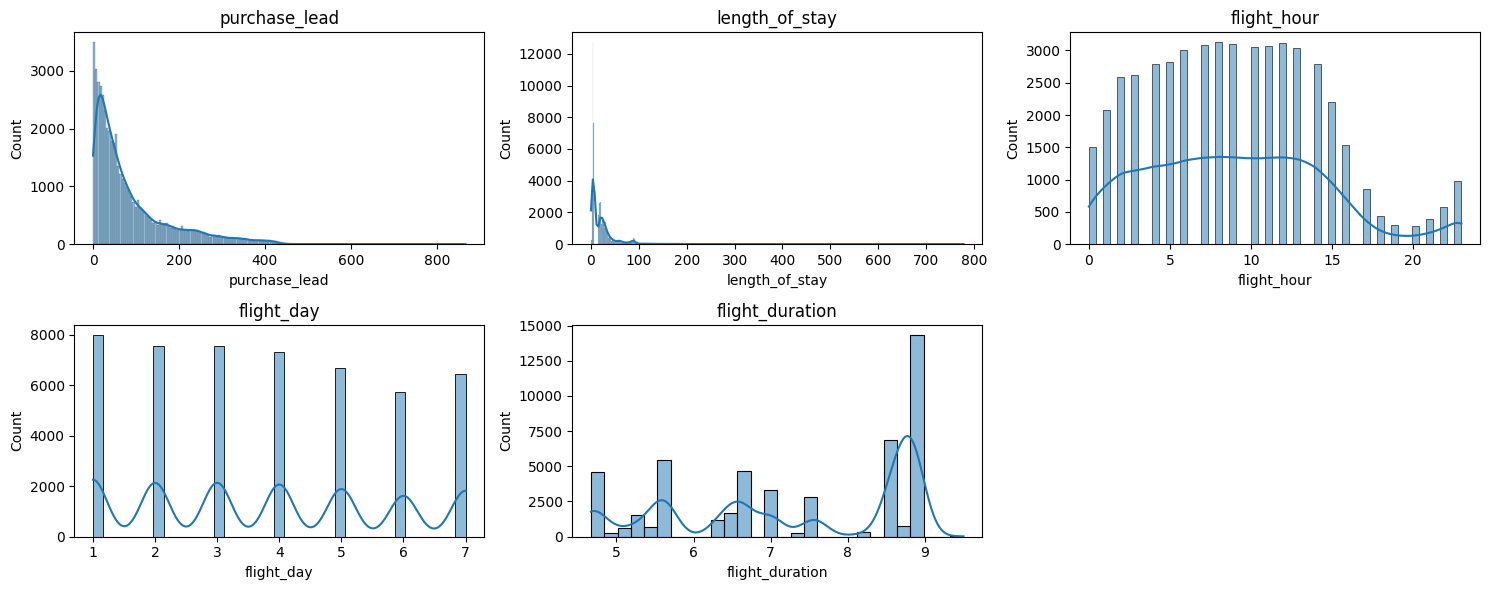

In [26]:
## skewness
## using histplot for numerics
num_cols = ['purchase_lead','length_of_stay','flight_hour','flight_day','flight_duration',]
plt.figure(figsize=(15,6))
for i, col in enumerate(num_cols):
  plt.subplot(2,3,i+1)
  sns.histplot(df[col], kde=True)
  plt.title(col)
plt.tight_layout()
plt.show()

In [27]:
## investigate outliers
df[df['purchase_lead']>=300].head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
9,1,Mobile,RoundTrip,378,30,12,7,AKLDEL,India,0,0,0,5.52,0
19,1,Internet,RoundTrip,351,17,3,7,AKLHGH,China,0,0,0,5.07,0
42,2,Internet,RoundTrip,346,23,8,1,AKLICN,South Korea,1,0,1,6.62,0
63,4,Internet,RoundTrip,311,27,6,6,AKLICN,New Zealand,0,1,0,6.62,0
65,2,Internet,RoundTrip,314,43,10,7,AKLICN,New Zealand,0,0,0,6.62,0


In [28]:
df.groupby('booking_complete')['purchase_lead'].describe()

,count,mean,std,min,25%,50%,75%,max
booking_complete,,,,,,,,
0,41890.0,85.563762,90.500332,0.0,22.0,52.0,116.0,704.0
1,7391.0,79.959681,89.755331,0.0,18.0,46.0,106.0,867.0


In [29]:
df.groupby('booking_complete')['length_of_stay'].describe()

,count,mean,std,min,25%,50%,75%,max
booking_complete,,,,,,,,
0,41890.0,23.651969,33.768309,0.0,5.0,17.0,29.0,773.0
1,7391.0,19.664727,33.995823,1.0,5.0,6.0,23.0,778.0


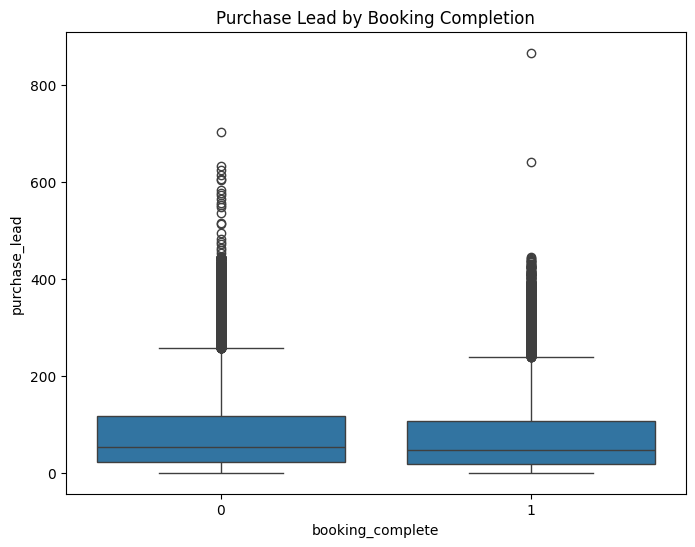

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='booking_complete', y='purchase_lead', data=df)
plt.title('Purchase Lead by Booking Completion')
plt.show()

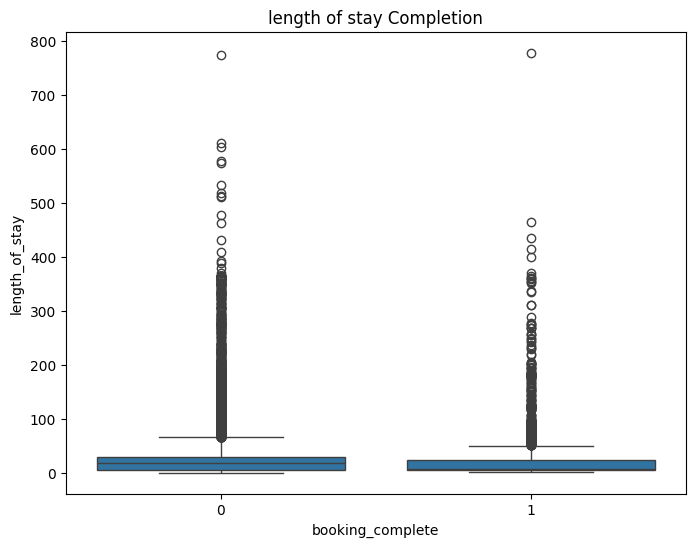

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='booking_complete', y='length_of_stay', data=df)
plt.title('length of stay Completion')
plt.show()

In [32]:
# handle skweness and outliers
#Cap Extremes: Based on max values, clip to reasonable limits (e.g., 365 days for 1 year ahead):
upper_limit = df['purchase_lead'].quantile(0.99)  # ~ top 1% as outliers
df['purchase_lead'] = df['purchase_lead'].clip(upper=upper_limit)

In [33]:
df.groupby('booking_complete')['purchase_lead'].describe()

,count,mean,std,min,25%,50%,75%,max
booking_complete,,,,,,,,
0,41890.0,85.267248,89.372433,0.0,22.0,52.0,116.0,390.0
1,7391.0,79.676498,88.514988,0.0,18.0,46.0,106.0,390.0


In [34]:
## also for length of stay
upper_limit = df["length_of_stay"].quantile(0.99)
df["length_of_stay"] = df["length_of_stay"].clip(upper = upper_limit)

In [35]:
df.groupby('booking_complete')['length_of_stay'].describe()

,count,mean,std,min,25%,50%,75%,max
booking_complete,,,,,,,,
0,41890.0,22.848699,27.753311,0.0,5.0,17.0,29.0,167.0
1,7391.0,18.808822,27.154290,1.0,5.0,6.0,23.0,167.0


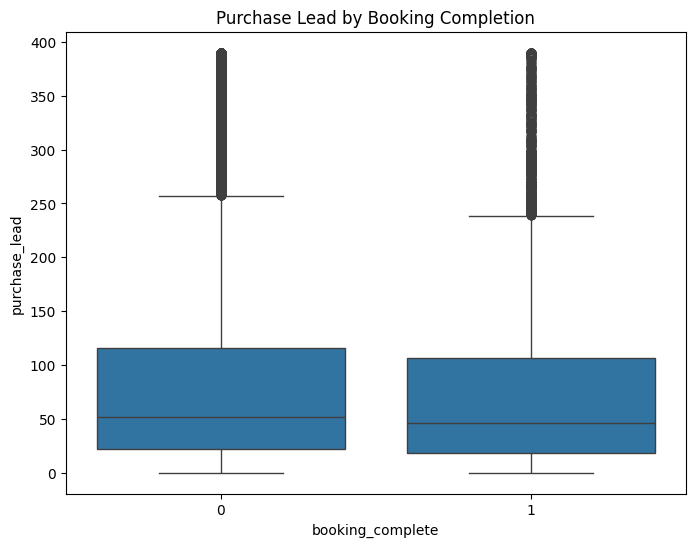

In [36]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='booking_complete', y='purchase_lead', data=df)
plt.title('Purchase Lead by Booking Completion')
plt.show()

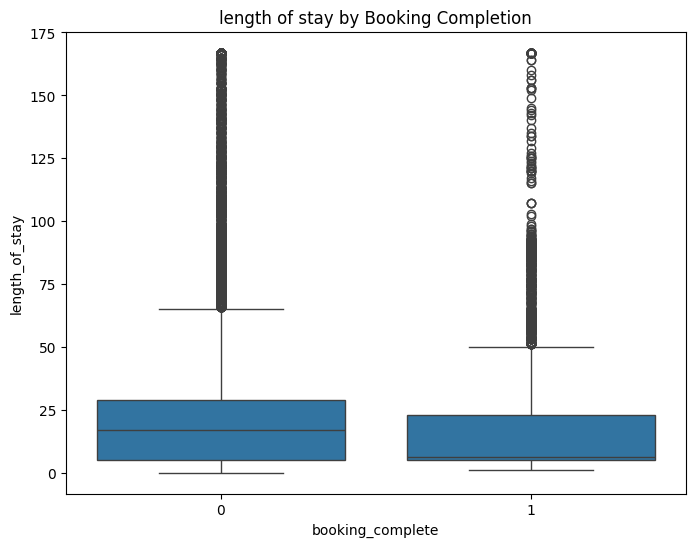

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='booking_complete', y='length_of_stay', data=df)
plt.title('length of stay by Booking Completion')
plt.show()

### **Univariate analysis**

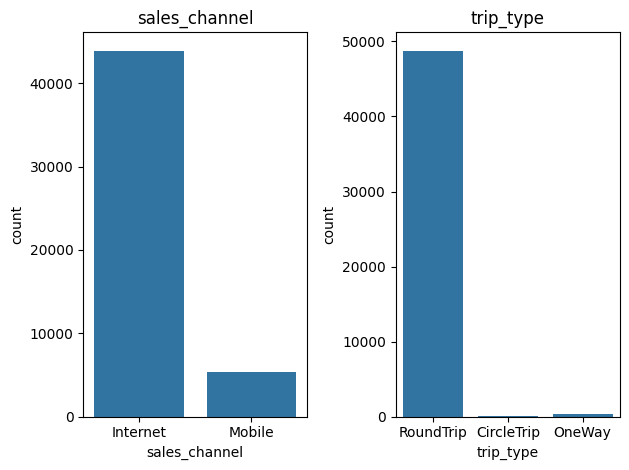

In [38]:
## numerics: histplot/ boxplots for distribution
## categorical: count
cat = ['sales_channel','trip_type']
for i, col in enumerate(cat):
  plt.subplot(1,2,i+1)
  sns.countplot(x=df[col])
  plt.title(col)
plt.tight_layout()
plt.show()


<Axes: xlabel='booking_complete', ylabel='count'>

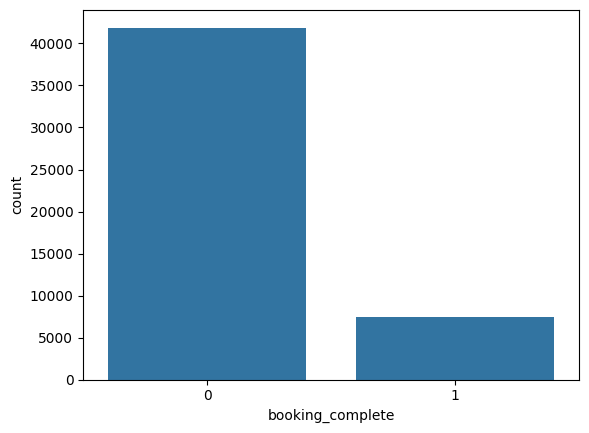

In [39]:
# target
sns.countplot(x=df['booking_complete'])

### **Bivariate / Multivariate Analysis**

In [40]:
##Target correlation
df.groupby('sales_channel')['booking_complete'].mean()

sales_channel
Internet    0.154883
Mobile      0.109806
Name: booking_complete, dtype: float64

In [41]:
df.groupby('trip_type')['booking_complete'].mean()

trip_type
CircleTrip    0.043103
OneWay        0.051813
RoundTrip     0.151008
Name: booking_complete, dtype: float64

<Axes: xlabel='booking_complete', ylabel='length_of_stay'>

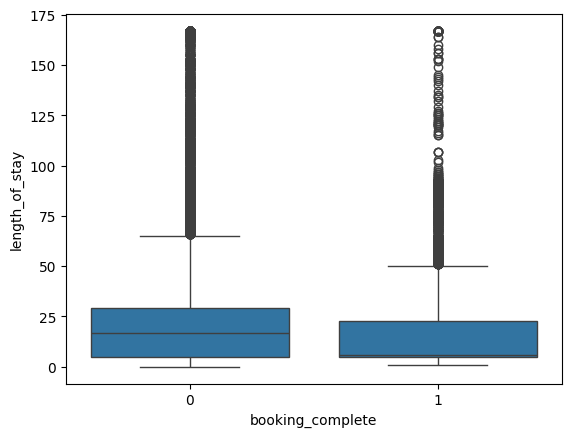

In [42]:
## cross-plots: boxplot by target
sns.boxplot(x='booking_complete', y = 'length_of_stay', data=df)

<Axes: >

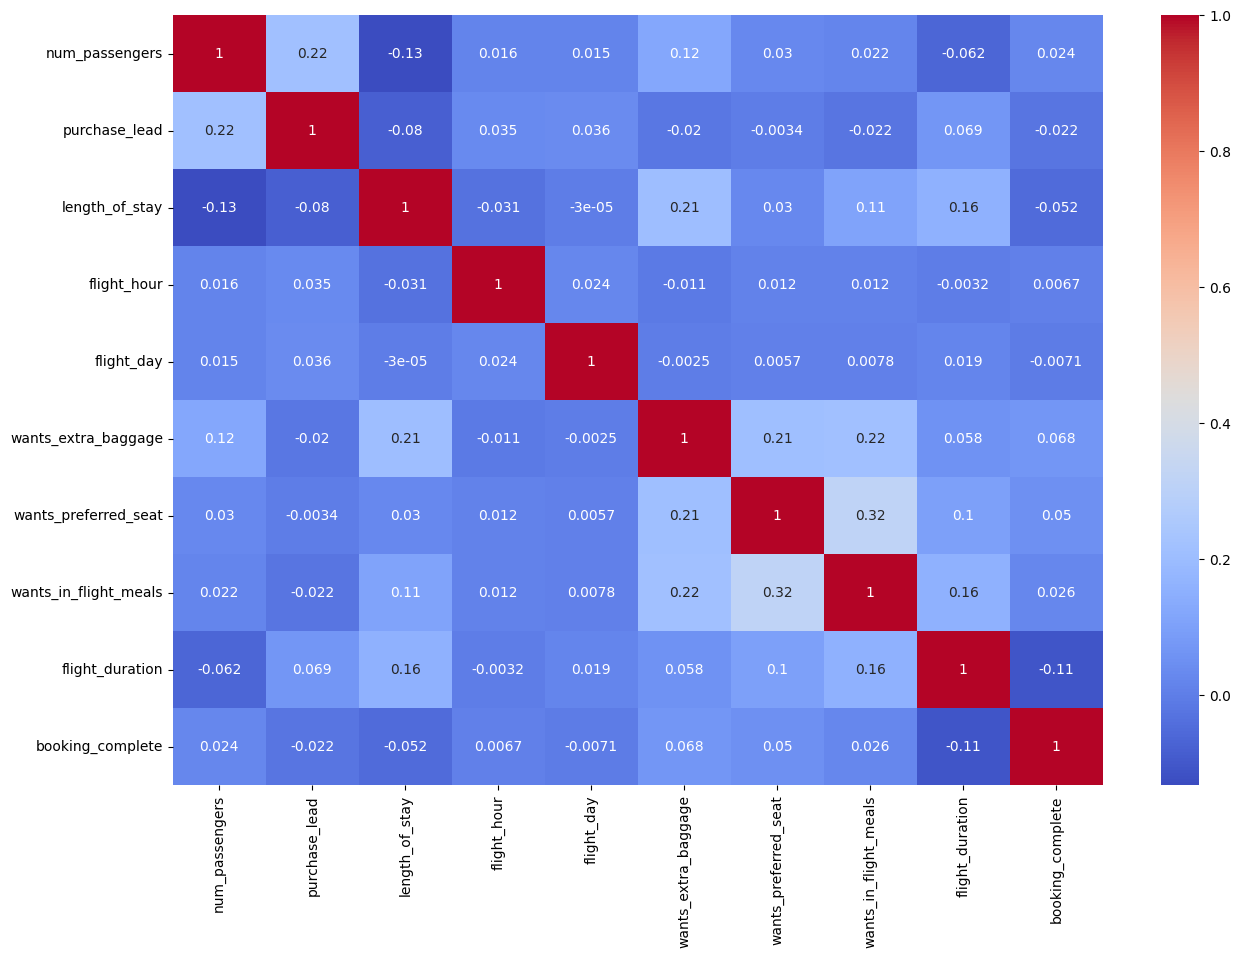

In [43]:
## correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm')

In [44]:
# key insight note:
## - what drive booking

## **Data Preparation (clean and enginner Features)**

In [45]:
# handling skeweness and outliers
df['purchase_lead_log'] = np.log1p(df['purchase_lead'])
df['length_of_stay_log'] = np.log1p(df['length_of_stay'])

In [46]:
df['is_last_minute'] =( df['purchase_lead'] <= 7).astype(int)

In [47]:
df['is_night_flight'] = ((df['flight_hour'] >= 22) | (df['flight_hour'] <= 5)).astype(int)

In [48]:
df['is_weeken_flight'] = df['flight_day'].isin([6,7]).astype(int)

In [49]:
df['extra_count'] = (df['wants_extra_baggage']+df['wants_preferred_seat']+df['wants_in_flight_meals'])

<Axes: >

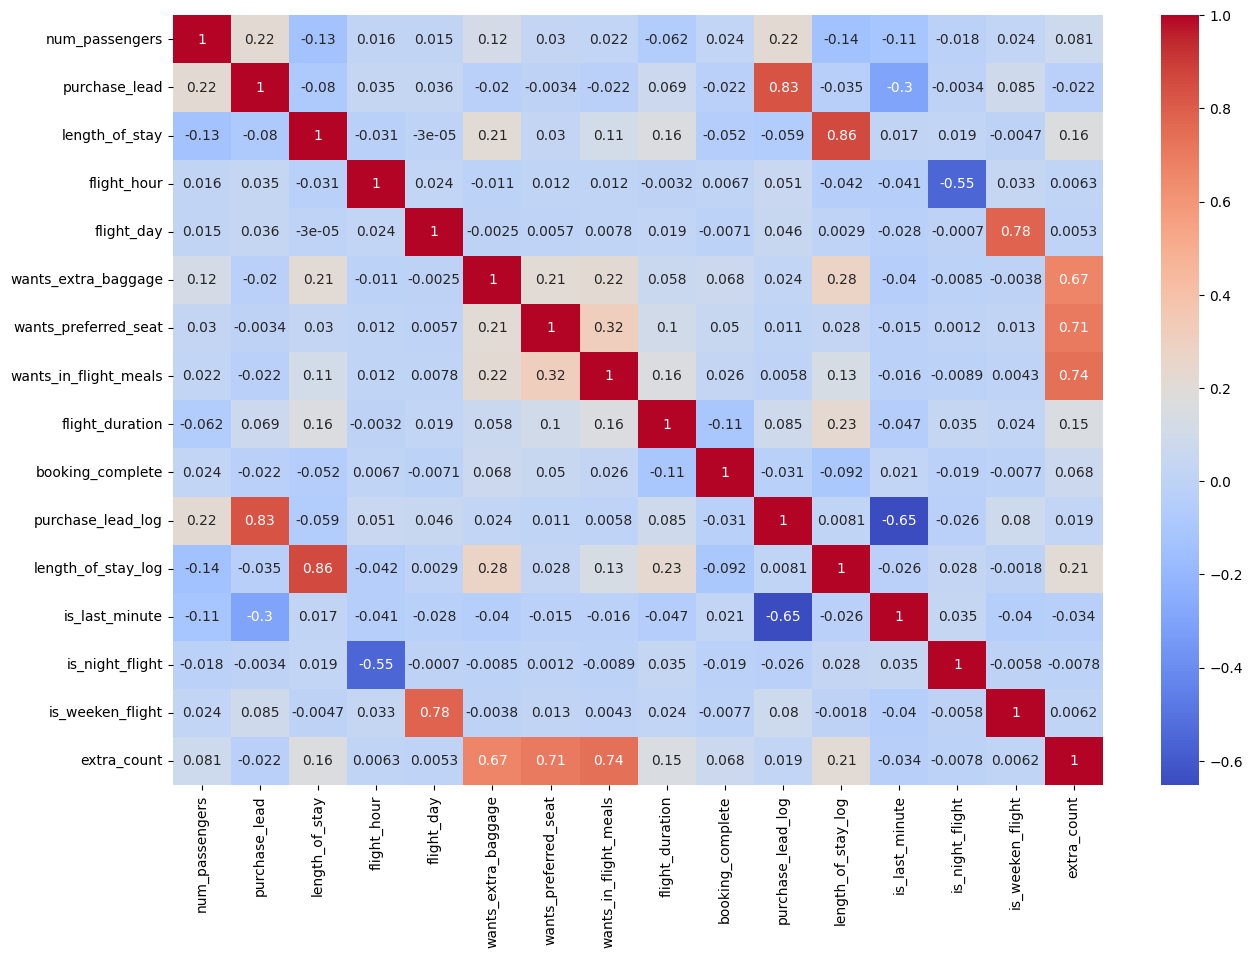

In [50]:
## xhexk for correlation again
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap='coolwarm')

In [51]:
## drops columns
df.drop(['purchase_lead', 'length_of_stay', 'wants_preferred_seat', 'wants_in_flight_meals', 'is_weeken_flight'], axis=1,inplace=True)

In [52]:
from sklearn.model_selection import  train_test_split

In [53]:
## encoding and scaling
x = df.drop('booking_complete', axis=1)
y = df['booking_complete']

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)

In [55]:
import pickle

In [56]:
## route & origin popularity

route_freq = x_train['route'].value_counts(normalize = True)
booking_origin_freq = x_train['booking_origin'].value_counts(normalize = True)
## importing frequences for deploying
feature_mapping = {
    'route_popularity':route_freq.to_dict(),
    'booking_origin_popularity':booking_origin_freq.to_dict()
}
with open('../model/feature_mapping.pkl', 'wb') as f:
    pickle.dump(feature_mapping,f)
##
x_train['route_popularity'] = x_train['route'].map(route_freq)
x_test['route_popularity'] = x_test['route'].map(route_freq)
##
x_train['booking_origin_popularity'] = x_train['booking_origin'].map(booking_origin_freq)
x_test['booking_origin_popularity'] = x_test['booking_origin'].map(booking_origin_freq)

##
x_train['route_popularity'].fillna(0, inplace=True)
x_test['route_popularity'].fillna(0, inplace=True)
##
x_train['booking_origin_popularity'].fillna(0, inplace=True)
x_test['booking_origin_popularity'].fillna(0, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_3212\2935999430.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['route_popularity'].fillna(0, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_3212\2935999430.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [57]:
x_train.drop(columns=['route', 'booking_origin'], axis=1, inplace=True)
x_test.drop(columns=['route', 'booking_origin'], axis=1, inplace=True)

## **Modeling**

In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

In [59]:
categorical_cols = ['sales_channel', 'trip_type', 'flight_day']
binary_cols = ['is_last_minute', 'is_night_flight','wants_extra_baggage']
num_cols = ['extra_count', 'booking_origin_popularity', 'flight_hour','flight_duration','purchase_lead_log','length_of_stay_log','route_popularity','num_passengers']


In [60]:
## skewness
## using histplot for numerics
# plt.figure(figsize=(15,6))
# for i, col in enumerate(num_cols):
#   plt.subplot(3,3,i+1)
#   sns.histplot(x_train[col], kde=True)
#   plt.title(col)
# plt.tight_layout()
# plt.show()

In [61]:
## preprocessor

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'),categorical_cols ),
        ('bin', 'passthrough',binary_cols),
        ('num_cols','passthrough',num_cols),
    ],
    remainder = 'drop'
)

In [62]:
## pipeline
pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf',RandomForestClassifier(
                                  n_estimators=300,
                                  max_depth=None,
                                  max_features = 'sqrt',
                                  min_samples_leaf=10,
                                  min_samples_split=10,
                                  class_weight='balanced',
                                  random_state=42,
    ))
])


In [63]:
## training base line model
pipeline.fit(x_train,y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('bin', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [64]:
## predic
y_pred_proba = pipeline.predict_proba(x_test)[:,1]
y_pred = pipeline.predict(x_test)

### **clalculate performance metrics**

In [65]:
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
test_accuracy = (y_pred == y_test).mean()
cv_scores = cross_val_score(
    pipeline,
    x_train,
    y_train,
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = 42),
    scoring = 'roc_auc'
)



In [66]:
print("model_performance summary")
print("test roc auc",test_roc_auc)
print("scores mean:  ",cv_scores.mean())
print("test accuracy",test_accuracy)
print("classiifctaion report")
print(classification_report(y_test,y_pred))

model_performance summary
test roc auc 0.7636272845913998
scores mean:   0.7687618098288813
test accuracy 0.7642284670792331
classiifctaion report
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      8379
           1       0.33      0.57      0.42      1478

    accuracy                           0.76      9857
   macro avg       0.62      0.68      0.64      9857
weighted avg       0.83      0.76      0.79      9857



### **feature Importance visualization**

TOP 10 PREDICTIVE FEATURES
               clean_name  importance
Booking Origin Popularity    0.295495
         Route Popularity    0.141839
        Purchase Lead Log    0.117015
       Length Of Stay Log    0.115493
          Flight Duration    0.084673
              Flight Hour    0.076257
              Extra Count    0.041158
           Num Passengers    0.025114
      Wants Extra Baggage    0.020205
     Sales Channel Mobile    0.014112

 Saved: feature_importance.png


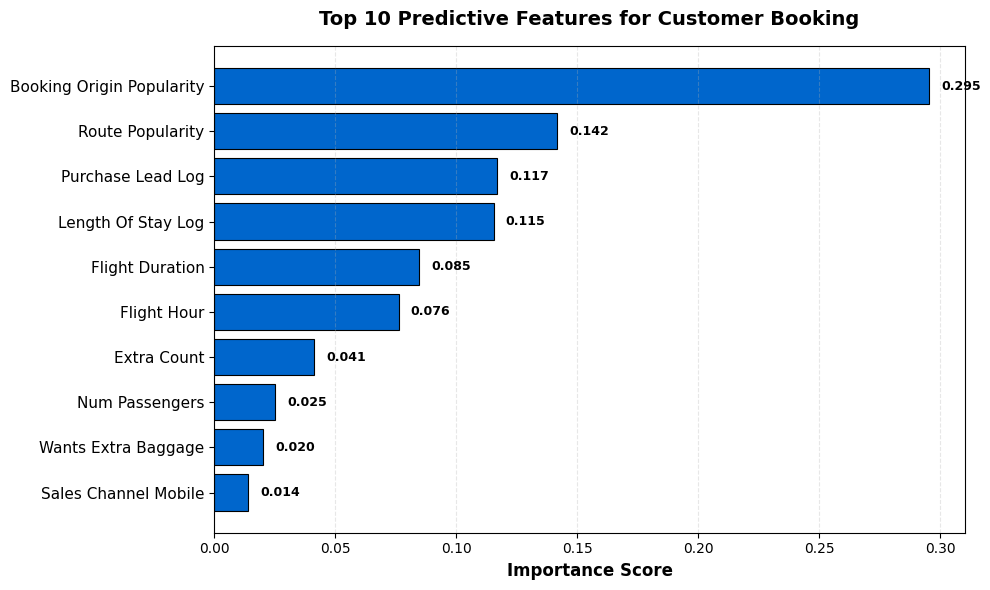

In [67]:
## get feature names and importances
feature_names = pipeline.named_steps['prep'].get_feature_names_out()
rf_model = pipeline.named_steps['clf']
importances = rf_model.feature_importances_

feature_importance_df= pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending= False)


# Clean names
def clean_name(name):
    name = name.replace('cat__', '')
    name = name.replace('bin__', '')
    name = name.replace('num_cols__', '')
    name = name.replace('_', ' ').title()
    return name

feature_importance_df['clean_name'] = feature_importance_df['feature'].apply(clean_name)

print("TOP 10 PREDICTIVE FEATURES")
print(feature_importance_df[['clean_name', 'importance']].head(10).to_string(index=False))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
top_10 = feature_importance_df.head(10)
bars = ax.barh(range(10), top_10['importance'].values, color='#0066CC', edgecolor='black', linewidth=0.8)
ax.set_yticks(range(10))
ax.set_yticklabels(top_10['clean_name'].values, fontsize=11)
ax.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Predictive Features for Customer Booking', fontsize=14, fontweight='bold', pad=15)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 0.005, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
            ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight', facecolor='white')
print("\n Saved: feature_importance.png")
plt.show()


 Saved: roc_curve.png


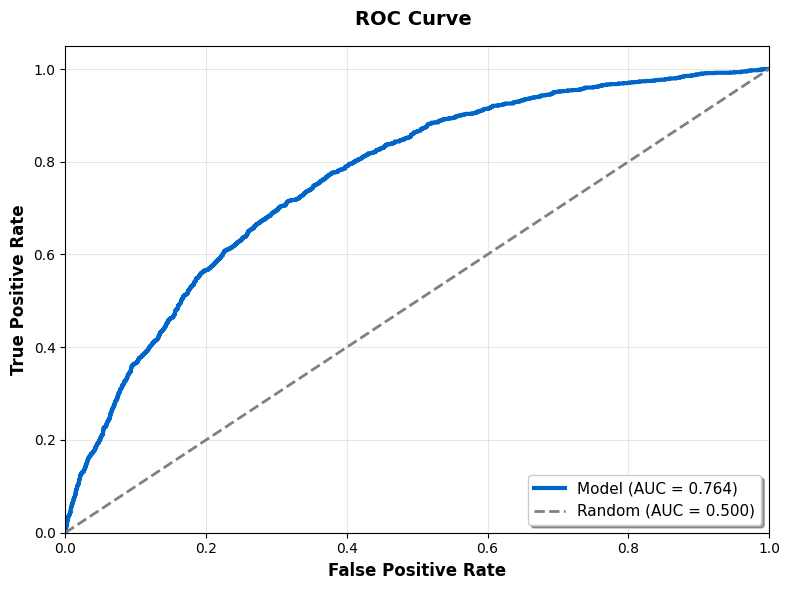

In [68]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, color='#0066CC', lw=3, label=f'Model (AUC = {roc_auc_value:.3f})')
ax.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random (AUC = 0.500)')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax.set_title('ROC Curve ', fontsize=14, fontweight='bold', pad=15)
ax.legend(loc="lower right", fontsize=11, frameon=True, shadow=True)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight', facecolor='white')
print(" Saved: roc_curve.png")
plt.show()

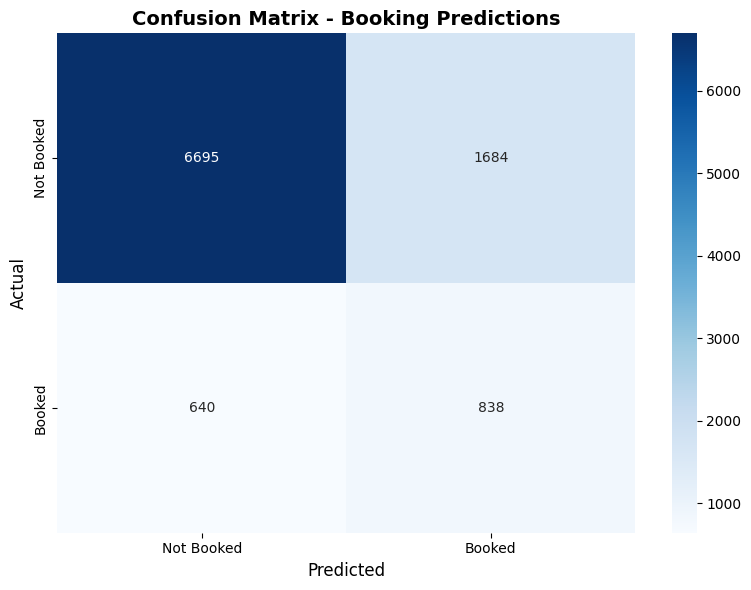

In [69]:
## confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Booked', 'Booked'],
            yticklabels=['Not Booked', 'Booked'])
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.title('Confusion Matrix - Booking Predictions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix_ba.png', dpi=300, bbox_inches='tight')
plt.show()

In [70]:
## hyper parameter tuning using grid search cv
# param_grid = {'clf__n_estimators': [100,200,300],
#               'clf__max_depth': [10,15,20,None],
#               'clf__min_samples_split': [10,20,50],
#               'clf__min_samples_leaf': [5,10,20],
#               'clf__max_features': ['sqrt', 'log2']}
# grid_search = GridSearchCV(
#     pipeline,
#     param_grid,
#     cv = StratifiedKFold(5),
#     scoring = 'roc_auc',
#     n_jobs = -1
# )

In [71]:
# grid_search.fit(x_train, y_train)

In [72]:
# # best model
# best_model = grid_search.best_estimator_
# y_proba = best_model.predict_proba(x_test)[:,1]
# y_pred = best_model.predict(x_test)

In [73]:
# roc_auc_score(y_test,y_proba)

In [74]:
# print(classification_report(y_test,y_pred))

In [75]:
# print(grid_search.best_params_)

In [76]:
from sklearn.metrics import classification_report
for thresh in [0.5, 0.4, 0.3, 0.6]:
    y_pred_adj = (y_pred_proba >= thresh).astype(int)
    print(f"\nThreshold {thresh}:")
    print(classification_report(y_test, y_pred_adj))


Threshold 0.5:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      8379
           1       0.33      0.57      0.42      1478

    accuracy                           0.76      9857
   macro avg       0.62      0.68      0.64      9857
weighted avg       0.83      0.76      0.79      9857


Threshold 0.4:
              precision    recall  f1-score   support

           0       0.93      0.66      0.77      8379
           1       0.28      0.73      0.40      1478

    accuracy                           0.67      9857
   macro avg       0.60      0.70      0.59      9857
weighted avg       0.83      0.67      0.72      9857


Threshold 0.3:
              precision    recall  f1-score   support

           0       0.95      0.51      0.67      8379
           1       0.24      0.85      0.37      1478

    accuracy                           0.56      9857
   macro avg       0.59      0.68      0.52      9857
weighted avg       0.84   

In [77]:
import pickle

In [78]:
with open('../model/model.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [79]:
# chosen_threshold = 0.4
# model_package = {
#     'model': pipeline,
#     'threshold': chosen_threshold,
#     'model_version': 'v1.0_booking_2025',
#     'date_trained': '2025-01-21',
#     'roc_auc_test': test_roc_auc
# }
# # save
# joblib.dump(model_package, 'booking_prediction_model_v1.joblib')